In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def simulate_prices(S, T, r, sigma, n_simulations, n_steps):
    dt = T / n_steps
    sqrt_dt = math.sqrt(dt)
    
    #generate random noise
    epsilon = np.random.normal(size=(n_simulations, n_steps))
    
    #calculate stock price trajectories
    price = np.random.normal(size=(n_simulations, n_steps+1))
    price [:, 0] = S
    
    for i in range(1, n_steps+1):
        drift = (r - 0.5 * sigma**2) * dt
        diffusion = sigma * sqrt_dt * epsilon[:, i-1]
        price[:,i] = price[:, i-1] * np.exp(drift + diffusion)
    
    return price 

#define variables
S = 100
T = 1
r = 0.05
sigma = 0.2
n_simulations = 1000
n_steps = 250

simulated_price = simulate_prices(S, T, r, sigma, n_simulations, n_steps)
print("Simulated price:", simulated_price[-1, -1])

Simulated price: 97.8837149547707


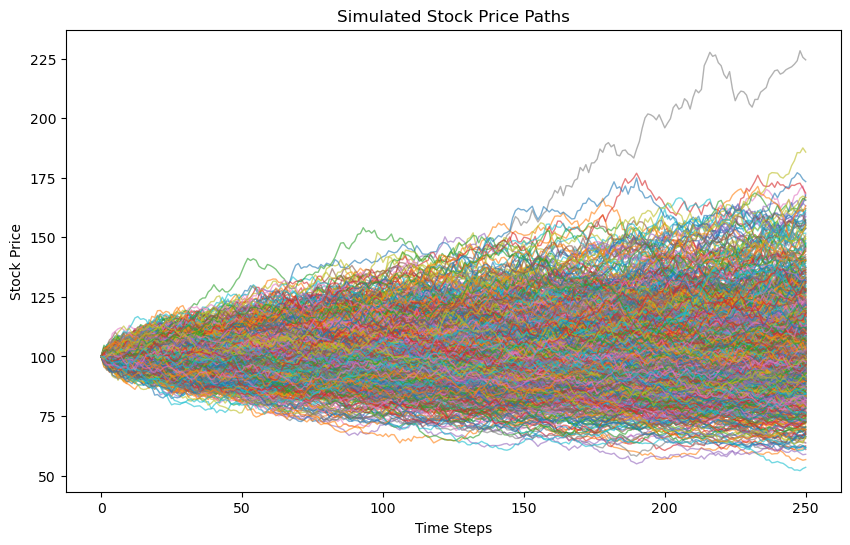

In [9]:
#generate paths
simulated_price = simulate_prices(S, T, r, sigma, n_simulations, n_steps)

#plot paths
plt.figure(figsize=(10,6))
for i in range(n_simulations):
    plt.plot(range(n_steps + 1), simulated_price[i, :], lw=1, alpha=0.6)

plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Simulated Stock Price Paths")
plt.show()
    